In [114]:
import pandas as pd
import seaborn as sns
from feature_engine.creation import MathFeatures, RelativeFeatures
from feature_engine.selection import SmartCorrelatedSelection

In [97]:
X = pd.DataFrame(dict(x1 = [1, 2, 3, 9], x2 = [0.01, 4, 5, 6]))
target_y = pd.Series([56, 98, 100, 1.])

In [98]:
mf = MathFeatures(variables=['x1', 'x2'], func='prod')

In [99]:
mf.fit(X)
X = mf.transform(X)

In [100]:
rm = RelativeFeatures(variables=['x1', 'x2'], reference=['prod_x1_x2'], func=['add', 'mod'])

In [101]:
rm.fit(X)
rm.transform(X)

,x1,x2,prod_x1_x2,x1_add_prod_x1_x2,x2_add_prod_x1_x2,x1_mod_prod_x1_x2,x2_mod_prod_x1_x2
0,1,0.01,0.01,1.01,0.02,0.01,0.0
1,2,4.00,8.00,10.00,12.00,2.00,4.0
2,3,5.00,15.00,18.00,20.00,3.00,5.0
3,9,6.00,54.00,63.00,60.00,9.00,6.0


In [102]:
loop_df = X.copy()

In [103]:
loop_df = loop_df.astype(float)

,x1_div_x1_add_x1,x2_div_x1_mul_x1_div_x1_mul_x1,x1_div_x1,x2_div_x1_mul_x1_div_x1_mul_x1_div_x1_div_x1,x1_div_x1_add_x1_sub_x1,x1_sub_x1,x2_sub_x1,x1,x2,target
0,2.0,0.01,1.0,0.010000,1.0,0.0,-0.99,1.0,0.01,56.0
1,3.0,4.00,1.0,1.000000,1.0,0.0,2.00,2.0,4.00,98.0
2,4.0,5.00,1.0,0.555556,1.0,0.0,2.00,3.0,5.00,100.0
3,10.0,6.00,1.0,0.074074,1.0,0.0,-3.00,9.0,6.00,1.0


<AxesSubplot: >

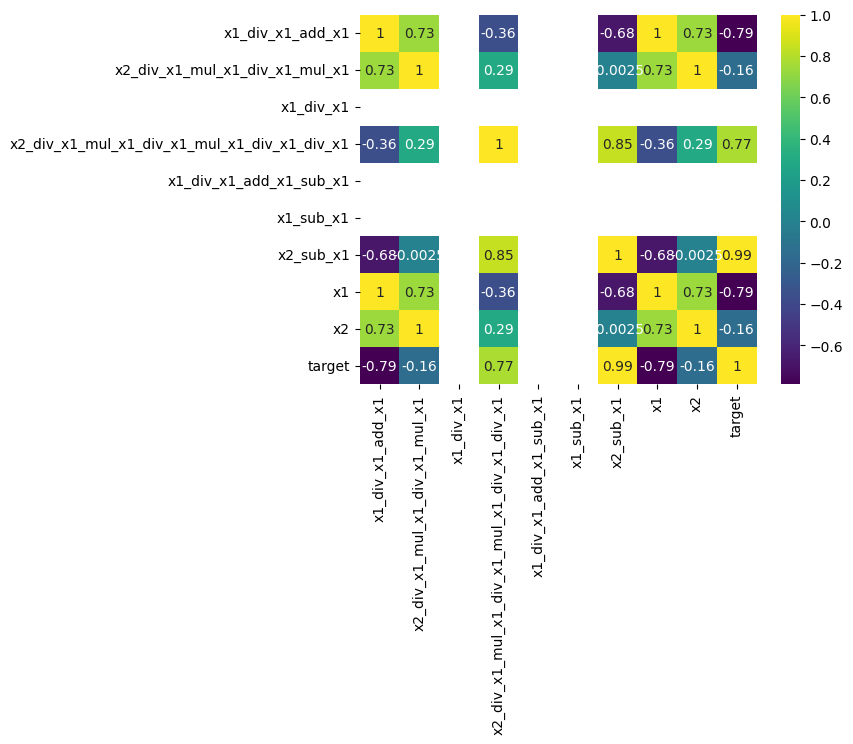

In [136]:
# TODO logging/archiving

# cell simulates user interactive feature engineering loop
# UI
ops = ['add', 'mul', 'div', 'sub']
intent_feats = ['x1']
select_feats = ['x2']
exclude_feats = []

# Loop
# drop features that user defined to be excluded
loop_df = loop_df.drop(exclude_feats, axis=1, errors='ignore')
# init feature construction
feat_constr = RelativeFeatures(variables=loop_df.columns.to_list(), reference=intent_feats, func=ops)
# apply feature construction
loop_df = feat_constr.fit_transform(loop_df)
# feature selection
antiselection_variables = list(set(intent_feats) | set(select_feats))
selected_df = pd.DataFrame(SmartCorrelatedSelection().fit_transform(loop_df, target_y))
for col in antiselection_variables:
    selected_df[col] = loop_df[col]
loop_df = selected_df
# output to user
display(pd.concat([loop_df, pd.DataFrame({'target':target_y})], axis=1))
display(sns.heatmap(pd.concat([loop_df, pd.DataFrame({'target':target_y})], axis=1).corr(), cmap='viridis', annot=True))
# TODO show feature formula, its importance, histograms and etc


In [ ]:
# cell to simulate export of feature engineering loop 